## Classification of Temperature into Categories

In [27]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('merged_data_clean.csv')

# Convert date column to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Add weekday column right after date
df.insert(1, 'Weekday', df['Datum'].dt.day_name())

# Extract year and calendar week (temporary for calculation)
df['Year'] = df['Datum'].dt.year
df['Week'] = df['Datum'].dt.isocalendar().week

# Calculate average temperature per calendar week across all years
weekly_avg_temp = df.groupby('Week')['Temperatur'].mean().reset_index()
weekly_avg_temp.columns = ['Week', 'AverageTemp']

# Add average temperatures to main dataframe
df = df.merge(weekly_avg_temp, on='Week', how='left')

# Calculate temperature deviation
df['Temp_Deviation'] = df['Temperatur'] - df['AverageTemp']

def categorize_temp_deviation(deviation):
    if pd.isna(deviation):
        return None
    if abs(deviation) <= 0.5:
        return "Normal"
    elif 0.5 < deviation <= 2.0:
        return "Slightly warmer"
    elif deviation > 2.0:
        return "Significantly warmer"
    elif -2.0 <= deviation < -0.5:
        return "Slightly colder"
    else:  # deviation < -1.0
        return "Significantly colder"


df['Temp_vs_Avg'] = df['Temp_Deviation'].apply(categorize_temp_deviation)

# Drop temporary columns
df = df.drop(['Year', 'Week'], axis=1)

# Replace Warengruppe numbers with product names
warengruppe_mapping = {
    1: 'Brot',
    2: 'Brötchen', 
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
df['Warengruppe'] = df['Warengruppe'].map(warengruppe_mapping)

# Display first few rows with new features
print("First few rows with new features:")
print(df.head(10))

# Save the updated DataFrame to a new CSV file
df.to_csv('merged_data_with_temperature.csv', index=False)

First few rows with new features:
       Datum    Weekday  Bewoelkung  Temperatur  Windgeschwindigkeit  \
0 2012-01-01     Sunday         8.0        9.82                   14   
1 2012-01-02     Monday         7.0        7.44                   12   
2 2012-01-03    Tuesday         8.0        5.54                   18   
3 2012-01-04  Wednesday         4.0        5.69                   19   
4 2012-01-05   Thursday         6.0        5.30                   23   
5 2012-01-06     Friday         3.0        2.62                   10   
6 2012-01-07   Saturday         7.0        6.53                   14   
7 2012-01-08     Sunday         7.0        5.96                   10   
8 2012-01-09     Monday         8.0        5.15                   12   
9 2012-01-10    Tuesday         6.0        6.11                   10   

   Wettercode  id Warengruppe  Umsatz  KielerWoche  AverageTemp  \
0        58.0 NaN         NaN     NaN          NaN     6.504342   
1         NaN NaN         NaN     NaN  

/tmp/ipykernel_11102/2575727994.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=df, ci=95, order=cat_order)


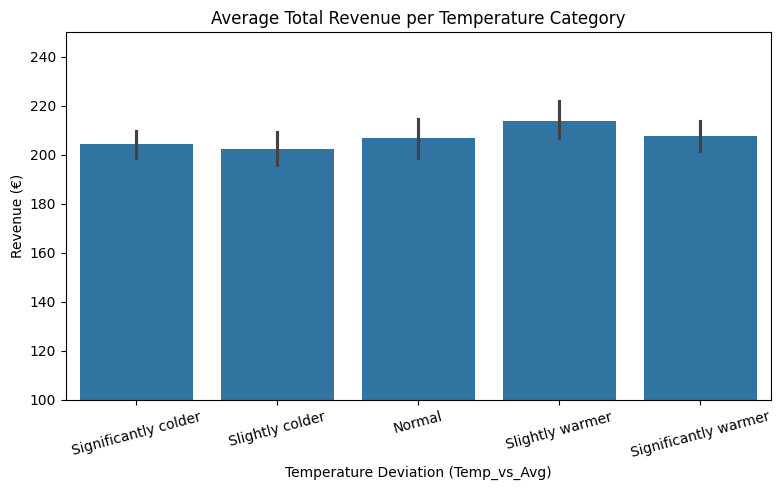

/tmp/ipykernel_11102/2575727994.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=subset, ci=95, order=cat_order)


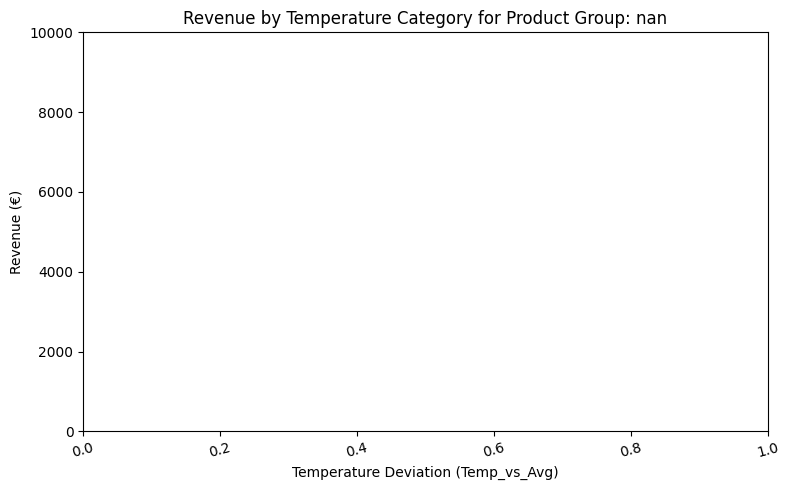

/tmp/ipykernel_11102/2575727994.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=subset, ci=95, order=cat_order)


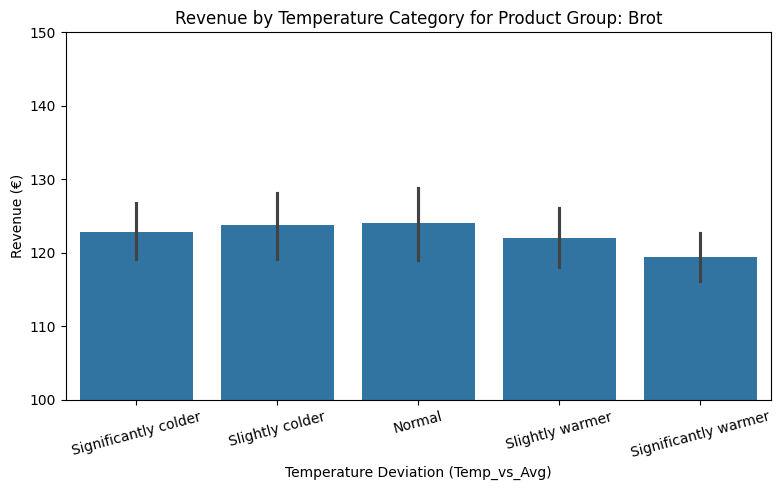

/tmp/ipykernel_11102/2575727994.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=subset, ci=95, order=cat_order)


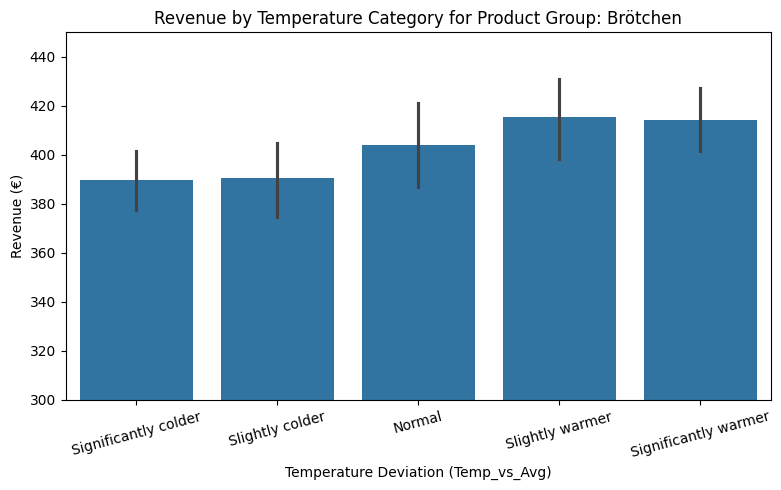

/tmp/ipykernel_11102/2575727994.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=subset, ci=95, order=cat_order)


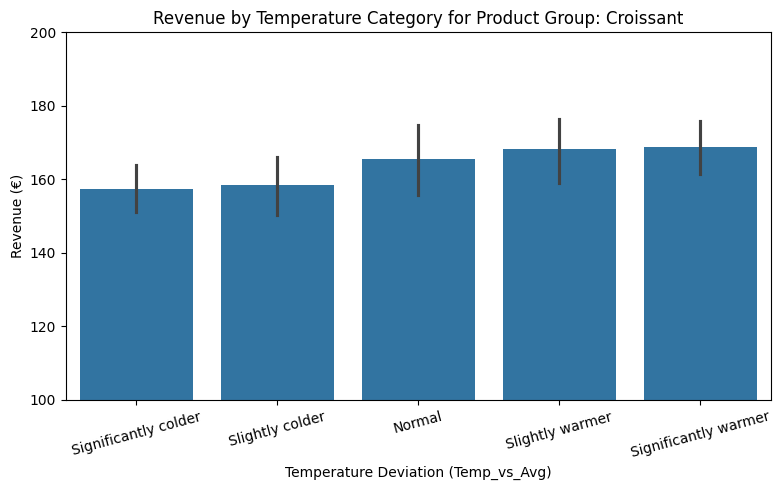

/tmp/ipykernel_11102/2575727994.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=subset, ci=95, order=cat_order)


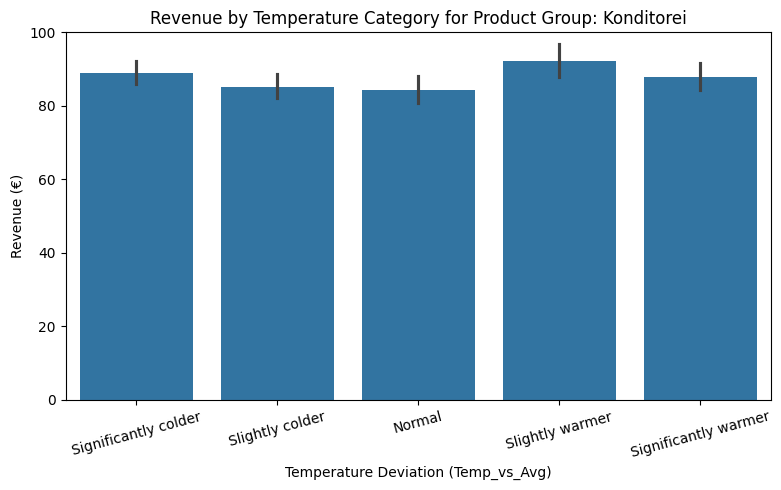

/tmp/ipykernel_11102/2575727994.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=subset, ci=95, order=cat_order)


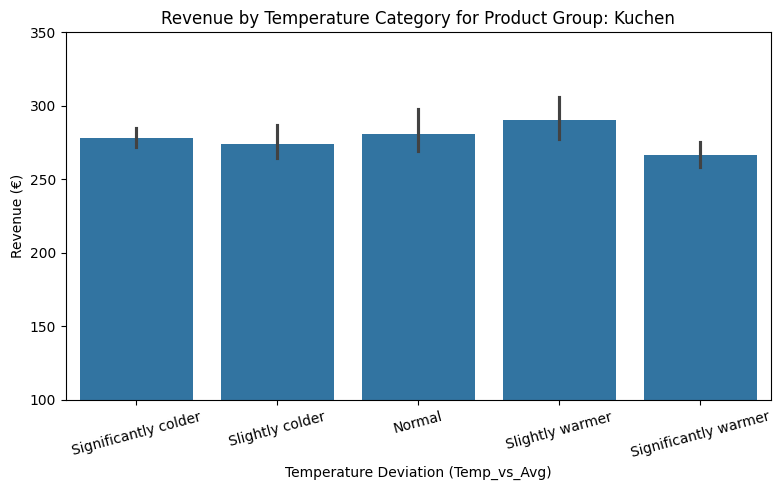

/tmp/ipykernel_11102/2575727994.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=subset, ci=95, order=cat_order)


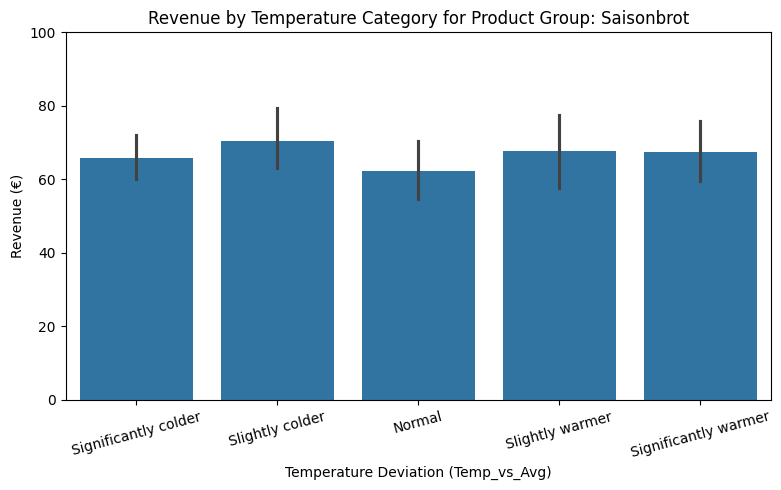

In [35]:
# Datenquelle:
# /workspaces/Bakery_predictions/0_DataPreparation/initialdata/cleaned_data_with_KielerWoche_zero.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datei laden
df = pd.read_csv('/workspaces/Bakery_predictions/0_DataPreparation/initialdata/merged_data_with_temperature.csv')

# NaN in 'Temp_vs_Avg' entfernen
df = df.dropna(subset=['Temp_vs_Avg'])

# Reihenfolge der Kategorien für Temp_vs_Avg definieren
cat_order = [
    'Significantly colder',
    'Slightly colder',
    'Normal',
    'Slightly warmer',
    'Significantly warmer'
]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reihenfolge der Kategorien für Temp_vs_Avg definieren
cat_order = [
    'Significantly colder',
    'Slightly colder',
    'Normal',
    'Slightly warmer',
    'Significantly warmer'
]

df['Temp_vs_Avg'] = pd.Categorical(df['Temp_vs_Avg'], categories=cat_order, ordered=True)

# Barplot 1: Average total revenue per temperature category
plt.figure(figsize=(8, 5))
sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=df, ci=95, order=cat_order)
plt.title('Average Total Revenue per Temperature Category')
plt.xlabel('Temperature Deviation (Temp_vs_Avg)')
plt.ylabel('Revenue (€)')
plt.ylim(100, 250)  # Manual y-axis limits
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Product groups
produktgruppen = df['Warengruppe'].unique()

# Manual y-axis limits for each product group
limits = {
    'Brot': (100, 150),
    'Brötchen': (300, 450),
    'Croissant': (100, 200),
    'Konditorei': (0, 100),
    'Kuchen': (100, 350),
    'Saisonbrot': (0, 100)
}

# Barplots for each product group with individual y-axis limits
for produkt in produktgruppen:
    plt.figure(figsize=(8, 5))
    subset = df[df['Warengruppe'] == produkt]
    sns.barplot(x='Temp_vs_Avg', y='Umsatz', data=subset, ci=95, order=cat_order)
    plt.title(f'Revenue by Temperature Category for Product Group: {produkt}')
    plt.xlabel('Temperature Deviation (Temp_vs_Avg)')
    plt.ylabel('Revenue (€)')

    # Apply manual y-limits if defined
    if produkt in limits:
        plt.ylim(limits[produkt])
    else:
        plt.ylim(0, 10000)  # Optional: default limit if not defined

    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()






/tmp/ipykernel_1947/4058122018.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday_Label', y='Umsatz', data=df, ci=95)


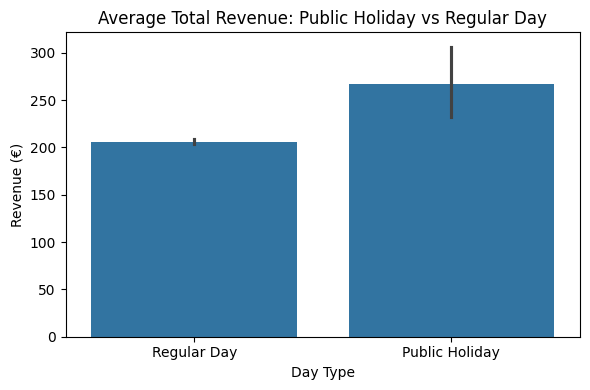

/tmp/ipykernel_1947/4058122018.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday_Label', y='Umsatz', data=subset, ci=95)


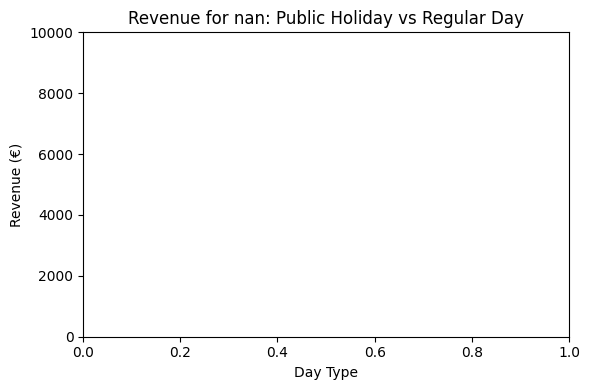

/tmp/ipykernel_1947/4058122018.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday_Label', y='Umsatz', data=subset, ci=95)


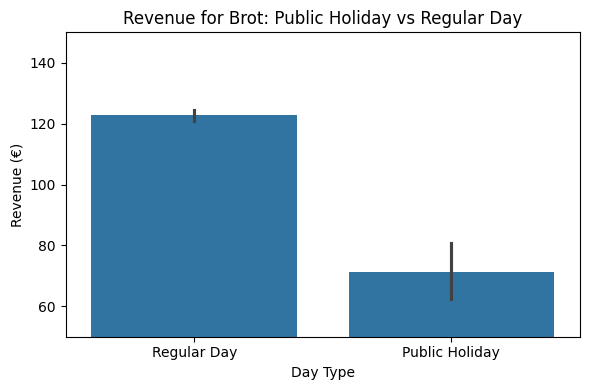

/tmp/ipykernel_1947/4058122018.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday_Label', y='Umsatz', data=subset, ci=95)


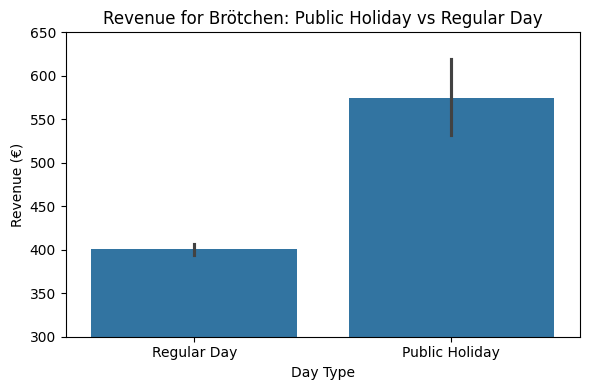

/tmp/ipykernel_1947/4058122018.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday_Label', y='Umsatz', data=subset, ci=95)


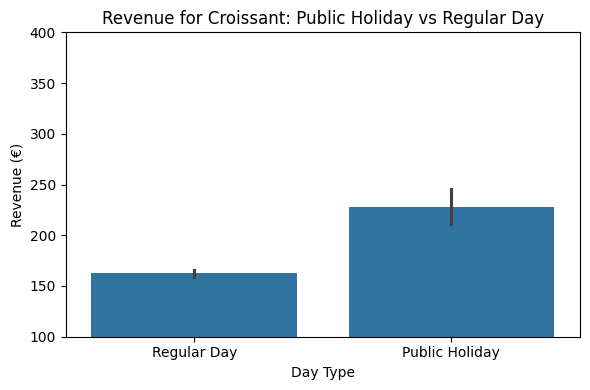

/tmp/ipykernel_1947/4058122018.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday_Label', y='Umsatz', data=subset, ci=95)


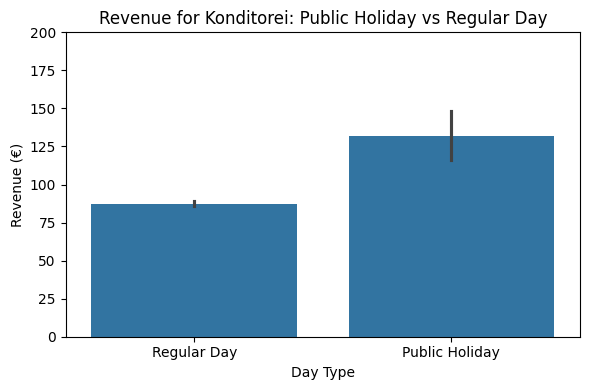

/tmp/ipykernel_1947/4058122018.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday_Label', y='Umsatz', data=subset, ci=95)


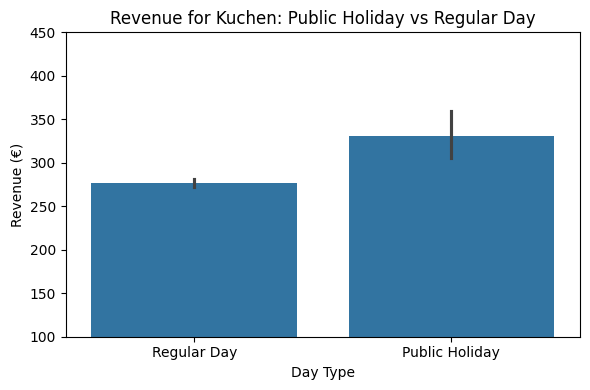

/tmp/ipykernel_1947/4058122018.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Holiday_Label', y='Umsatz', data=subset, ci=95)


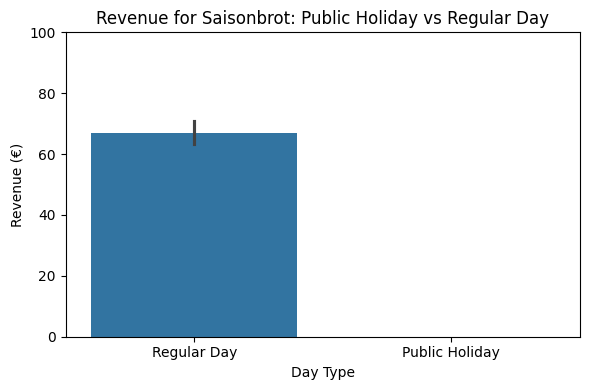

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/workspaces/Bakery_predictions/0_DataPreparation/initialdata/merged_data_temperature+holidays+weather_impressions.csv')

# Map holiday status to descriptive English labels
df['Holiday_Label'] = df['Is_Holiday'].map({0: 'Regular Day', 1: 'Public Holiday'})

# Ensure consistent order: Regular Day first
df['Holiday_Label'] = pd.Categorical(df['Holiday_Label'], categories=['Regular Day', 'Public Holiday'], ordered=True)

# Plot: Total revenue on public holidays vs regular days
plt.figure(figsize=(6, 4))
sns.barplot(x='Holiday_Label', y='Umsatz', data=df, ci=95)
plt.title('Average Total Revenue: Public Holiday vs Regular Day')
plt.xlabel('Day Type')
plt.ylabel('Revenue (€)')
plt.tight_layout()
plt.show()

# Revenue by product group
product_groups = df['Warengruppe'].unique()

# Y-axis limits per product group
limits = {
    'Brot': (50, 150),
    'Brötchen': (300, 650),
    'Croissant': (100, 400),
    'Konditorei': (0, 200),
    'Kuchen': (100, 450),
    'Saisonbrot': (0, 100)
}

# Plot revenue by product group
for product in product_groups:
    subset = df[df['Warengruppe'] == product]
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Holiday_Label', y='Umsatz', data=subset, ci=95)
    plt.title(f'Revenue for {product}: Public Holiday vs Regular Day')
    plt.xlabel('Day Type')
    plt.ylabel('Revenue (€)')

    if product in limits:
        plt.ylim(limits[product])
    else:
        plt.ylim(0, 10000)

    plt.tight_layout()
    plt.show()


In [33]:
import pandas as pd

# Datei laden
df = pd.read_csv('/workspaces/Bakery_predictions/0_DataPreparation/initialdata/cleaned_data_with_KielerWoche_zero.csv')

# Nur die gewünschten Spalten auswählen
cols = ['Datum', 'Weekday', 'id', 'Warengruppe', 'Umsatz', 'KielerWoche', 'Temp_vs_Avg', 'Weather_Impression', 'Is_Holiday']
df_reduced = df[cols]

# Als neue CSV speichern
df_reduced.to_csv('/workspaces/Bakery_predictions/0_DataPreparation/initialdata/clean_data.csv', index=False)

print("Datei erfolgreich gespeichert.")


Datei erfolgreich gespeichert.


### Classification of Weather into Categories


In [4]:
import pandas as pd

# 1. Load the CSV file
df = pd.read_csv("merged_data_with_temperature.csv")

# 2. Fill missing weather codes with 0
df['Wettercode'] = df['Wettercode'].fillna(0)

# 3. Define the weather rating function
def categorize_weather(code):
    if code in [9, 17, 18, 19, 29] + list(range(30, 40)) + [80, 81, 82, 85, 86] + list(range(95, 100)):
        return "very bad"
    elif code in [13, 22, 23, 26, 27] + list(range(68, 80)) + list(range(83, 89)) + [93, 94]:
        return "bad"
    elif code in [20, 21, 24, 25] + list(range(50, 60)) + list(range(60, 66)) + [91, 92]:
        return "okay"
    elif code in [3, 4, 5, 6, 7, 8, 10, 11, 12] + list(range(28, 30)) + list(range(40, 50)):
        return "good"
    elif code in [0, 1, 2]:
        return "very good"
    else:
        return "unknown"


# 4. Apply classification
df['Weather_Impression'] = df['Wettercode'].apply(weather_rating_revised)


# 5. Save the updated file
df.to_csv("merged_data_temperature+weather_impression.csv", index=False)
print("New file saved as: merged_data_temperature+weather_impression.csv")




New file saved as: merged_data_temperature+weather_impression.csv


/tmp/ipykernel_1947/3278564217.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Weather_Impression', y='Umsatz', data=df, ci=95, order=weather_order)


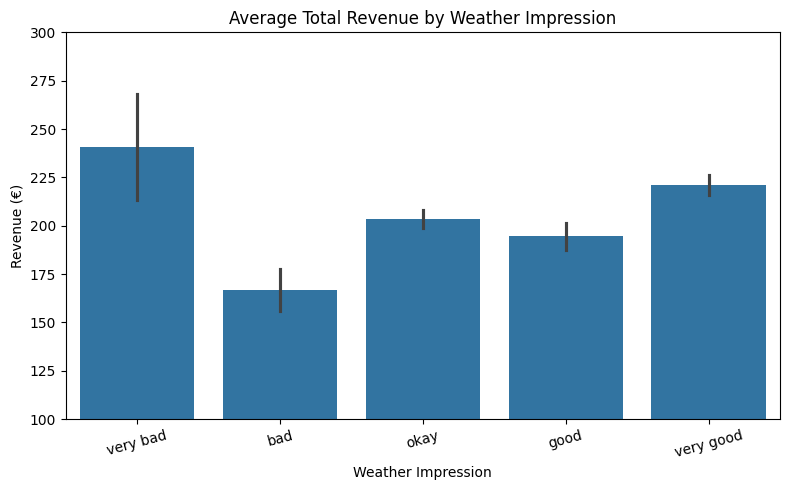

/tmp/ipykernel_1947/3278564217.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Weather_Impression', y='Umsatz', data=subset, ci=95, order=weather_order)


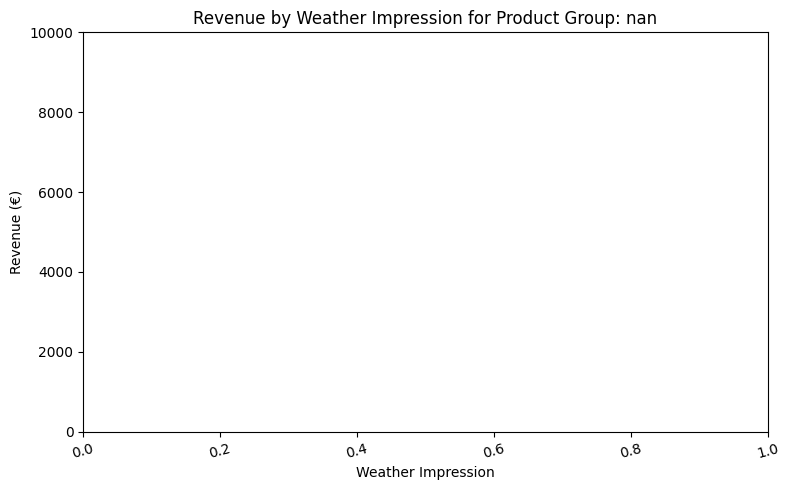

/tmp/ipykernel_1947/3278564217.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Weather_Impression', y='Umsatz', data=subset, ci=95, order=weather_order)


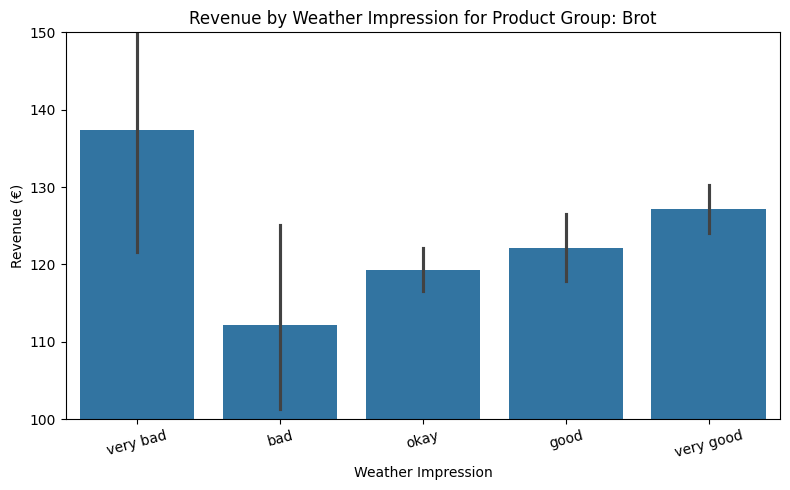

/tmp/ipykernel_1947/3278564217.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Weather_Impression', y='Umsatz', data=subset, ci=95, order=weather_order)


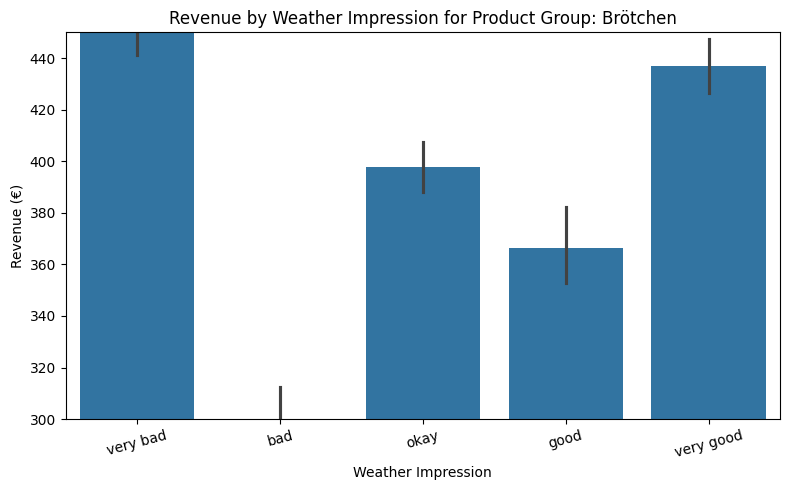

/tmp/ipykernel_1947/3278564217.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Weather_Impression', y='Umsatz', data=subset, ci=95, order=weather_order)


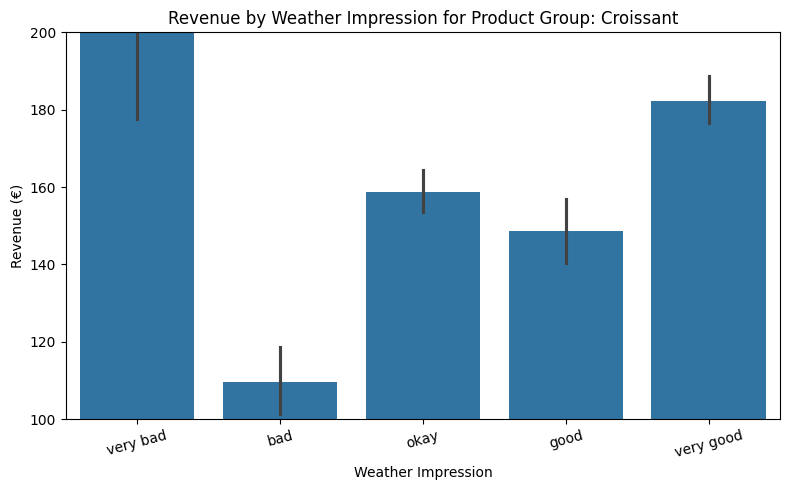

/tmp/ipykernel_1947/3278564217.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Weather_Impression', y='Umsatz', data=subset, ci=95, order=weather_order)


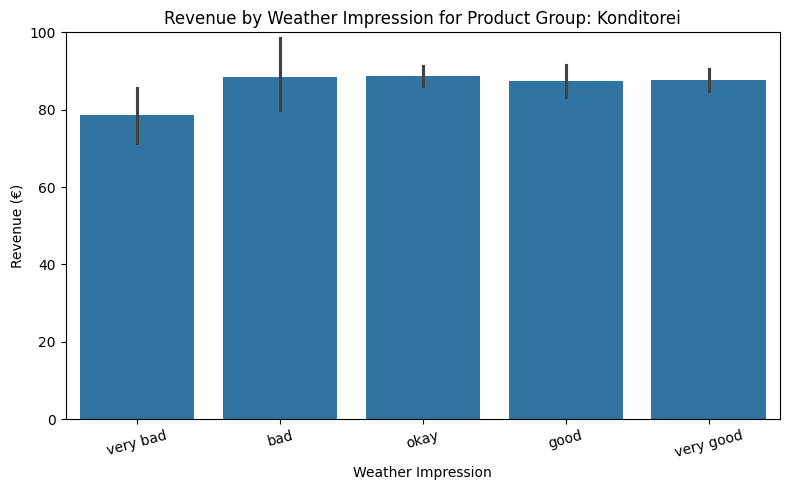

/tmp/ipykernel_1947/3278564217.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Weather_Impression', y='Umsatz', data=subset, ci=95, order=weather_order)


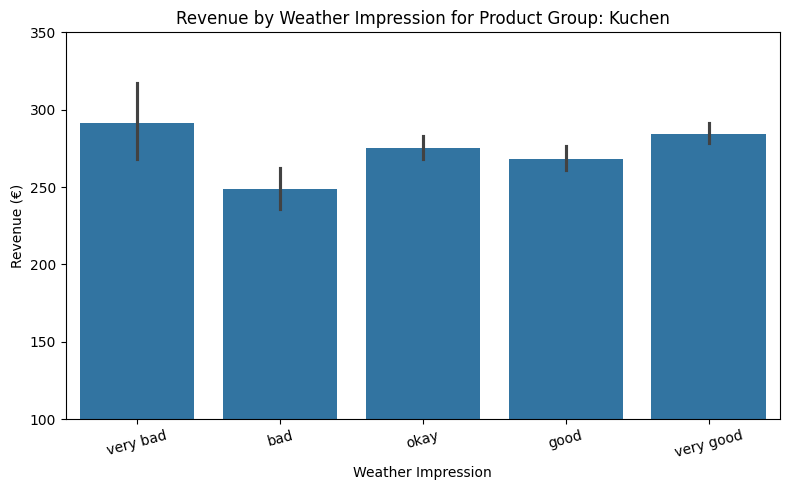

/tmp/ipykernel_1947/3278564217.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Weather_Impression', y='Umsatz', data=subset, ci=95, order=weather_order)


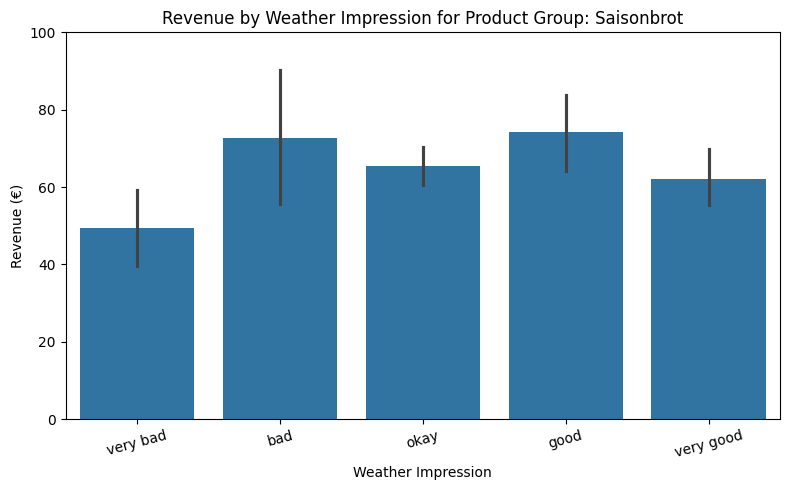

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/workspaces/Bakery_predictions/0_DataPreparation/initialdata/merged_data_temperature+weather_impression.csv')

# Remove rows with missing Weather_Impression
df = df[df['Weather_Impression'].notna()]

# Define category order
weather_order = ['very bad', 'bad', 'okay', 'good', 'very good']

# Ensure correct order for plotting
df['Weather_Impression'] = pd.Categorical(df['Weather_Impression'], categories=weather_order, ordered=True)

# Barplot 1: Total revenue by Weather_Impression
plt.figure(figsize=(8, 5))
sns.barplot(x='Weather_Impression', y='Umsatz', data=df, ci=95, order=weather_order)
plt.title('Average Total Revenue by Weather Impression')
plt.xlabel('Weather Impression')
plt.ylabel('Revenue (€)')
plt.ylim(100, 300)  # Manual Y-axis limits
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Product groups
produktgruppen = df['Warengruppe'].unique()

# Manual Y-axis limits for each product group
limits = {
    'Brot': (100, 150),
    'Brötchen': (300, 450),
    'Croissant': (100, 200),
    'Konditorei': (0, 100),
    'Kuchen': (100, 350),
    'Saisonbrot': (0, 100)
}

# Plot revenue by Weather_Impression for each product group
for produkt in produktgruppen:
    plt.figure(figsize=(8, 5))
    subset = df[df['Warengruppe'] == produkt]
    sns.barplot(x='Weather_Impression', y='Umsatz', data=subset, ci=95, order=weather_order)
    plt.title(f'Revenue by Weather Impression for Product Group: {produkt}')
    plt.xlabel('Weather Impression')
    plt.ylabel('Revenue (€)')

    if produkt in limits:
        plt.ylim(limits[produkt])
    else:
        plt.ylim(0, 10000)

    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


### Addition of German holidays into csv

In [18]:
import pandas as pd

# 1. Load main data
df_main = pd.read_csv("merged_data_temperature+weather_impression.csv")

# 2. Load holidays data
df_holidays = pd.read_csv("german_holidays.csv")  

# 3. Convert 'Datum' columns to datetime
df_main['Datum'] = pd.to_datetime(df_main['Datum'])
df_holidays['Datum'] = pd.to_datetime(df_holidays['Datum'])

# 4. Merge on 'Datum'
df_merged = pd.merge(df_main, df_holidays[['Datum', 'Is_Holiday']], on='Datum', how='left')

# 5. Fill NaNs in 'Is_Holiday' with 0 (non-holiday)
df_merged['Is_Holiday'] = df_merged['Is_Holiday'].fillna(0).astype(int)

# 6. Save the updated file
df_merged.to_csv("/workspaces/Bakery_predictions/0_DataPreparation/initialdata/merged_data_temperature+holidays+weather_impressions.csv", index=False)

print("Merged file saved with holiday information.")


Merged file saved with holiday information.
